In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("scibearia/university-admission-in-russia-2014-2023")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\scibearia\university-admission-in-russia-2014-2023\versions\1


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:\\Users\\user\\.cache\\kagglehub\\datasets\\scibearia\\university-admission-in-russia-2014-2023\\versions\\1\\University and vocational schools admission in Russia 2014-2023.csv", sep =';')

In [6]:
df

,Index,Education level,Degree,Tuition fees,ID,Branches of Science,Group of Professions,Year,Number of Applications,Number of Students
0,1,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Mathematics and Mechanics,2014,47923.0,7144.0
1,2,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Computer Science,2014,28787.0,3238.0
2,3,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Physics and Astronomy,2014,23906.0,4391.0
3,4,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Chemistry,2014,25930.0,2367.0
4,5,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Earth Science,2014,43434.0,6745.0
...,...,...,...,...,...,...,...,...,...,...
5563,5564,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,8,Arts and Culture,Design and Restoration,2014,NaN,3471.0
5564,5565,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,8,Arts and Culture,Film and Screen Arts,2014,NaN,162.0
5565,5566,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,9,Military Science,Military Management,2014,NaN,0.0
5566,5567,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,9,Military Science,Ensuring National Security,2014,NaN,NaN


Pt.0 Тенденция по направлениям

In [5]:
VE=df[df['Education level'] == 'Vocational Education'].pivot_table(index = 'Year', columns = 'Branches of Science', values = 'Number of Students', aggfunc = np.sum).astype(int)
VE.drop( columns = ['Military Science', 'Oriental and African Studies'], inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_5876\659318850.py:1: FutureWarning: The provided callable <function sum at 0x0000013FFFB1A160> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  VE=df[df['Education level'] == 'Vocational Education'].pivot_table(index = 'Year', columns = 'Branches of Science', values = 'Number of Students', aggfunc = np.sum).astype(int)


In [6]:
VE#поступивших на среднее 
VE.style.background_gradient(cmap='Blues', axis = 1)

Branches of Science,Agriculture,Arts and Culture,Education Sciences and Pedagogy,Engineering and Technology,Healthcare and Medicine,Humanities,Mathematical and Natural Sciences,Social Sciences
Year,,,,,,,,
2014,28891,30468,47072,298327,78734,16011,462,172855
2015,30650,31151,47852,308166,82098,17073,458,181851
2016,54664,35162,48332,500589,91392,19013,522,201682
2017,55919,37151,48585,477438,93892,19822,490,230537
2018,56749,40057,51127,472743,97385,20956,553,250544
2019,58368,43571,54708,489762,101854,21747,499,271628
2020,60228,46493,56052,514053,111722,23067,525,301926
2021,58478,49400,56917,471627,113074,24192,524,303625
2022,63428,51726,60639,509786,123124,25994,534,316973


Распределение по специальностям студентов в среднеобразовательных учреждениях

Видно, что наиболее популярные направления у абитуриентовя: технологии и социальные науки

In [7]:
HE = df[(df['Education level'] == 'Higher Education')&(~(df['Degree'] == "Master's degree"))].pivot_table(index = 'Year', columns = 'Branches of Science', values = 'Number of Students', aggfunc = np.sum).astype(int)
HE.drop( columns = ['Military Science', 'Oriental and African Studies'], inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_5876\1319249657.py:1: FutureWarning: The provided callable <function sum at 0x0000013FFFB1A160> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  HE = df[(df['Education level'] == 'Higher Education')&(~(df['Degree'] == "Master's degree"))].pivot_table(index = 'Year', columns = 'Branches of Science', values = 'Number of Students', aggfunc = np.sum).astype(int)


In [8]:
#кол-во поступивших на высшее
HE.style.background_gradient(cmap='Blues', axis = 1)

Branches of Science,Agriculture,Arts and Culture,Education Sciences and Pedagogy,Engineering and Technology,Healthcare and Medicine,Humanities,Mathematical and Natural Sciences,Social Sciences
Year,,,,,,,,
2014,42143,26658,100274,294646,52972,36344,36146,483737
2015,40018,27362,93021,292673,54139,36634,34893,435549
2016,38424,26753,90753,280982,54764,37386,35401,359520
2017,37854,25710,90870,275069,56816,37834,35713,339080
2018,40320,25383,93426,281810,59989,40386,37504,323574
2019,40518,23993,94309,284339,63099,42661,39047,312885
2020,39334,26085,88191,274500,64425,43055,38005,298018
2021,40167,27147,97071,291469,68063,43123,39904,299901
2022,39676,29152,102500,300388,71514,43919,39443,310984


Распределение по специальностям первокурсников в высших учреждениях

Видно, что технические и социальные науки в приоритете для поступления

При этом инженерное искусство имеет большую популярность в техникумах и колледжах 

In [9]:
res = HE- VE

Разница в студентах в высших и средних учебных заведениях

In [10]:
res.style.background_gradient(cmap='Blues', )

Branches of Science,Agriculture,Arts and Culture,Education Sciences and Pedagogy,Engineering and Technology,Healthcare and Medicine,Humanities,Mathematical and Natural Sciences,Social Sciences
Year,,,,,,,,
2014,13252,-3810,53202,-3681,-25762,20333,35684,310882
2015,9368,-3789,45169,-15493,-27959,19561,34435,253698
2016,-16240,-8409,42421,-219607,-36628,18373,34879,157838
2017,-18065,-11441,42285,-202369,-37076,18012,35223,108543
2018,-16429,-14674,42299,-190933,-37396,19430,36951,73030
2019,-17850,-19578,39601,-205423,-38755,20914,38548,41257
2020,-20894,-20408,32139,-239553,-47297,19988,37480,-3908
2021,-18311,-22253,40154,-180158,-45011,18931,39380,-3724
2022,-23752,-22574,41861,-209398,-51610,17925,38909,-5989


Светлый тон - среднее, темный - вузы

Разность в количестве первокурсников в высших и средних учебных заведениях
Видно, что кол-во студентов на технических специальностях в сред. уч. заведениях преоблодает и растет с каждым годом
Для ВУЗов характерны естественные науки и математика, педагогика.

In [11]:
df.groupby('Year')['Number of Students'].sum()

Year
2014    1864540.0
2015    1921090.0
2016    2109200.0
2017    2105822.0
2018    2138046.0
2019    2171518.0
2020    2207411.0
2021    2206934.0
2022    2353745.0
2023    2531088.0
Name: Number of Students, dtype: float64

Pt.1 Считаем кол-во фактических студентов

In [12]:
master = df[(df['Degree'] == "Master's degree")].groupby('Year')['Number of Students'].sum()
master.name = 'Master'
master

Year
2014    118799.0
2015    207502.0
2016    233851.0
2017    243030.0
2018    244517.0
2019    226791.0
2020    220060.0
2021    220594.0
2022    262158.0
2023    268805.0
Name: Master, dtype: float64

In [13]:
Scholarship_master = df[(df['Degree'] == "Master's degree") & (df['Tuition fees'] == 'Scholarship / tuition-free')].groupby('Year')['Number of Students'].sum()
Scholarship_master.name = 'Scholarship_master'
Scholarship_master

Year
2014     73136.0
2015    113449.0
2016    127457.0
2017    140270.0
2018    149046.0
2019    130466.0
2020    121454.0
2021    123808.0
2022    158226.0
2023    133201.0
Name: Scholarship_master, dtype: float64

In [14]:
Bachelor = df[(df['Degree'] == "Bachelor's degree")].groupby('Year')['Number of Students'].sum()
Bachelor.name = 'Bachelor'
Bachelor

Year
2014    930935.0
2015    866623.0
2016    773865.0
2017    744987.0
2018    741059.0
2019    735094.0
2020    707250.0
2021    732139.0
2022    751832.0
2023    838892.0
Name: Bachelor, dtype: float64

In [15]:
Scholarship_Bachelor = df[(df['Degree'] == "Bachelor's degree") & (df['Tuition fees'] == 'Scholarship / tuition-free')].groupby('Year')['Number of Students'].sum()
Scholarship_Bachelor.name = 'Scholarship_Bachelor'
Scholarship_Bachelor

Year
2014    343541.0
2015    337027.0
2016    319575.0
2017    305200.0
2018    306748.0
2019    304599.0
2020    322409.0
2021    344353.0
2022    347410.0
2023    358847.0
Name: Scholarship_Bachelor, dtype: float64

In [16]:
Specialist = df[(df['Degree'] == "Specialist's degree")].groupby('Year')['Number of Students'].sum()
Specialist.name = 'Specialist'
Specialist

Year
2014    141986.0
2015    147666.0
2016    150128.0
2017    153971.0
2018    162356.0
2019    167496.0
2020    166035.0
2021    176364.0
2022    187551.0
2023    204334.0
Name: Specialist, dtype: float64

In [17]:
Scholarship_Specialist = df[(df['Degree'] == "Specialist's degree") & (df['Tuition fees'] == 'Scholarship / tuition-free')].groupby('Year')['Number of Students'].sum()
Scholarship_Specialist.name = 'Scholarship_Specialist'
Scholarship_Specialist

Year
2014    71303.0
2015    72527.0
2016    70968.0
2017    70049.0
2018    72183.0
2019    73154.0
2020    78066.0
2021    85990.0
2022    86445.0
2023    89995.0
Name: Scholarship_Specialist, dtype: float64

In [19]:
high_student = df[(df['Education level'] == 'Higher Education')& (~(df['Degree'] == "Master's degree"))].groupby('Year')['Number of Students'].sum()
#high_freshman = high - master
high_student.name = 'high_student'#Первокусники ВУЗий(бакалавр и специалитет)
high_student

Year
2014    1072921.0
2015    1014289.0
2016     923993.0
2017     898958.0
2018     903415.0
2019     902590.0
2020     873285.0
2021     908503.0
2022     939383.0
2023    1043226.0
Name: high_student, dtype: float64

In [20]:
high_student[2023]/high_student[2014]

np.float64(0.9723232185780687)

Число первокурсников в вузах упало на 3%

Сред. образование более популярно 

In [21]:
Scholarship_high = df[(df['Education level'] == 'Higher Education') & (df['Tuition fees'] == 'Scholarship / tuition-free')& (~(df['Degree'] == "Master's degree"))].groupby('Year')['Number of Students'].sum()
Scholarship_high.name = 'Scholarship_high' #количество первокурсников бюджетников/ВУЗ
Scholarship_high

Year
2014    414844.0
2015    409554.0
2016    390543.0
2017    375249.0
2018    378931.0
2019    377753.0
2020    400475.0
2021    430343.0
2022    433855.0
2023    448842.0
Name: Scholarship_high, dtype: float64

In [22]:
Vocational = df[(df['Education level'] == 'Vocational Education')].groupby('Year')['Number of Students'].sum()
Vocational.name = 'Vocational_student' #Первокурсники сред. уч. завед.
Vocational

Year
2014     672820.0
2015     699299.0
2016     951356.0
2017     963834.0
2018     990114.0
2019    1042137.0
2020    1114066.0
2021    1077837.0
2022    1152204.0
2023    1219057.0
Name: Vocational_student, dtype: float64

In [23]:
Vocational[2023]/Vocational[2014]

np.float64(1.8118620136143397)

Кол-во первокурсников в сред. обр. учреждения выросло на 81% с 2014 по 2023 год

In [24]:
Scholarship_Vocational = df[(df['Education level'] == 'Vocational Education') & (df['Tuition fees'] == 'Scholarship / tuition-free')].groupby('Year')['Number of Students'].sum()
Scholarship_Vocational.name = 'Scholarship_Vocational'
Scholarship_Vocational

Year
2014    455336.0
2015    455363.0
2016    688117.0
2017    685911.0
2018    674381.0
2019    682244.0
2020    696206.0
2021    686284.0
2022    724356.0
2023    739043.0
Name: Scholarship_Vocational, dtype: float64

In [25]:
Skill = df[(df['Degree'] == 'Skilled workers and Employees')].groupby('Year')['Number of Students'].sum()
Skill.name = 'Skilled workers and Employees'
Skill

Year
2016    224352.0
2017    219818.0
2018    207136.0
2019    209711.0
2020    213842.0
2021    206931.0
2022    209521.0
2023    212124.0
Name: Skilled workers and Employees, dtype: float64

In [26]:
Scholarship_Skill = df[(df['Degree'] == 'Skilled workers and Employees') & (df['Tuition fees'] == 'Scholarship / tuition-free')].groupby('Year')['Number of Students'].sum()
Scholarship_Skill.name = 'Scholarship_Skilled workers and Employees'
Scholarship_Skill

Year
2016    218793.0
2017    213338.0
2018    197961.0
2019    197584.0
2020    196539.0
2021    190047.0
2022    188971.0
2023    186729.0
Name: Scholarship_Skilled workers and Employees, dtype: float64

In [27]:
Mid_Pro = df[(df['Degree'] == 'Mid-Career Professionals')].groupby('Year')['Number of Students'].sum()
Mid_Pro.name = 'Mid-Career Professionals'
Mid_Pro

Year
2014     672820.0
2015     699299.0
2016     727004.0
2017     744016.0
2018     782978.0
2019     832426.0
2020     900224.0
2021     870906.0
2022     942683.0
2023    1006933.0
Name: Mid-Career Professionals, dtype: float64

In [28]:
Scholarship_Mid_Pro = df[(df['Degree'] == 'Mid-Career Professionals') & (df['Tuition fees'] == 'Scholarship / tuition-free')].groupby('Year')['Number of Students'].sum()
Scholarship_Mid_Pro.name = 'Scholarship_Mid-Career Professionals'
Scholarship_Mid_Pro

Year
2014    455336.0
2015    455363.0
2016    469324.0
2017    472573.0
2018    476420.0
2019    484660.0
2020    499667.0
2021    496237.0
2022    535385.0
2023    552314.0
Name: Scholarship_Mid-Career Professionals, dtype: float64

In [29]:
student_lvl = pd.concat([master, high_student, Vocational,Scholarship_master, Scholarship_high, Scholarship_Vocational],axis = 1)
student_lvl['Master_pay'] = student_lvl['Master'] - student_lvl['Scholarship_master']
student_lvl['High_pay'] =student_lvl['high_student'] - student_lvl['Scholarship_high']
student_lvl['Vocational_pay'] =student_lvl['Vocational_student'] - student_lvl['Scholarship_Vocational']

student_lvl.astype(int)

,Master,high_student,Vocational_student,Scholarship_master,Scholarship_high,Scholarship_Vocational,Master_pay,High_pay,Vocational_pay
Year,,,,,,,,,
2014,118799,1072921,672820,73136,414844,455336,45663,658077,217484
2015,207502,1014289,699299,113449,409554,455363,94053,604735,243936
2016,233851,923993,951356,127457,390543,688117,106394,533450,263239
2017,243030,898958,963834,140270,375249,685911,102760,523709,277923
2018,244517,903415,990114,149046,378931,674381,95471,524484,315733
2019,226791,902590,1042137,130466,377753,682244,96325,524837,359893
2020,220060,873285,1114066,121454,400475,696206,98606,472810,417860
2021,220594,908503,1077837,123808,430343,686284,96786,478160,391553
2022,262158,939383,1152204,158226,433855,724356,103932,505528,427848


Master	- магистры

high_student	- бакалавры и специалисты

Vocational_student	студенты среднеобразовательных учреждений

Scholarship_master	- магистры на бюджете

Scholarship_high	- бакалавры и специалисты на бюджете

Scholarship_Vocational	- студенты среднеобразовательных учреждений на бюджете

High_pay	- бакалавры и специалисты на договорной основе

Vocational_pay	- студенты среднеобразовательных учреждений на договорной основе

Master_pay - магичстры на договорной основе





Кол-во первокурсников в сред. обр. учреждения выросло на 81% с 2014 по 2023 год

А вот число первокурсников в вузах упало на 3%(бакалавриат специалитет)

Сред. образование более популярно

In [30]:
student_lvl2 = pd.concat([master, Bachelor, Specialist, Skill, Mid_Pro, Scholarship_master, Scholarship_Bachelor, Scholarship_Specialist, Scholarship_Skill, Scholarship_Mid_Pro,   ],axis = 1)
student_lvl2['Master_pay'] = student_lvl2['Master'] - student_lvl2['Scholarship_master']
student_lvl2['Bachelor_pay'] =student_lvl2['Bachelor'] - student_lvl2['Scholarship_Bachelor']
student_lvl2['Specialist_pay'] =student_lvl2['Specialist'] - student_lvl2['Scholarship_Specialist']
student_lvl2['Skilled workers and Employees pay'] = student_lvl2['Skilled workers and Employees'] - student_lvl2['Scholarship_Skilled workers and Employees']
student_lvl2['Mid-Career Professionals pay'] = student_lvl2['Mid-Career Professionals'] - student_lvl2['Scholarship_Mid-Career Professionals']
student_lvl2

,Master,Bachelor,Specialist,Skilled workers and Employees,Mid-Career Professionals,Scholarship_master,Scholarship_Bachelor,Scholarship_Specialist,Scholarship_Skilled workers and Employees,Scholarship_Mid-Career Professionals,Master_pay,Bachelor_pay,Specialist_pay,Skilled workers and Employees pay,Mid-Career Professionals pay
Year,,,,,,,,,,,,,,,
2014,118799.0,930935.0,141986.0,NaN,672820.0,73136.0,343541.0,71303.0,NaN,455336.0,45663.0,587394.0,70683.0,NaN,217484.0
2015,207502.0,866623.0,147666.0,NaN,699299.0,113449.0,337027.0,72527.0,NaN,455363.0,94053.0,529596.0,75139.0,NaN,243936.0
2016,233851.0,773865.0,150128.0,224352.0,727004.0,127457.0,319575.0,70968.0,218793.0,469324.0,106394.0,454290.0,79160.0,5559.0,257680.0
2017,243030.0,744987.0,153971.0,219818.0,744016.0,140270.0,305200.0,70049.0,213338.0,472573.0,102760.0,439787.0,83922.0,6480.0,271443.0
2018,244517.0,741059.0,162356.0,207136.0,782978.0,149046.0,306748.0,72183.0,197961.0,476420.0,95471.0,434311.0,90173.0,9175.0,306558.0
2019,226791.0,735094.0,167496.0,209711.0,832426.0,130466.0,304599.0,73154.0,197584.0,484660.0,96325.0,430495.0,94342.0,12127.0,347766.0
2020,220060.0,707250.0,166035.0,213842.0,900224.0,121454.0,322409.0,78066.0,196539.0,499667.0,98606.0,384841.0,87969.0,17303.0,400557.0
2021,220594.0,732139.0,176364.0,206931.0,870906.0,123808.0,344353.0,85990.0,190047.0,496237.0,96786.0,387786.0,90374.0,16884.0,374669.0
2022,262158.0,751832.0,187551.0,209521.0,942683.0,158226.0,347410.0,86445.0,188971.0,535385.0,103932.0,404422.0,101106.0,20550.0,407298.0


Pt.2 Рост от года к году

Выводы:

In [31]:
temp = pd.DataFrame(np.zeros(student_lvl.shape[0]*student_lvl.shape[1]).reshape(10,9))

In [32]:
temp.columns = student_lvl.columns
temp.index = student_lvl.index

In [33]:
for i in temp.columns:
    for k in temp.index[1:]:
        temp[i][k] = f"{((student_lvl[i][k] - student_lvl[i][k-1])/student_lvl[i][k-1]): .2%}"

C:\Users\user\AppData\Local\Temp\ipykernel_5876\1425887194.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp[i][k] = f"{((student_lvl[i][k] - student_lvl[i][k-1])/student_lvl[i][k-1]): .2%}"
C:\Users\user\AppData\Local\Temp\ipykernel_

In [34]:
#round(temp).astype(int) #Темпы роста 2014-2023
temp

,Master,high_student,Vocational_student,Scholarship_master,Scholarship_high,Scholarship_Vocational,Master_pay,High_pay,Vocational_pay
Year,,,,,,,,,
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,74.67%,-5.46%,3.94%,55.12%,-1.28%,0.01%,105.97%,-8.11%,12.16%
2016,12.70%,-8.90%,36.04%,12.35%,-4.64%,51.11%,13.12%,-11.79%,7.91%
2017,3.93%,-2.71%,1.31%,10.05%,-3.92%,-0.32%,-3.42%,-1.83%,5.58%
2018,0.61%,0.50%,2.73%,6.26%,0.98%,-1.68%,-7.09%,0.15%,13.60%
2019,-7.25%,-0.09%,5.25%,-12.47%,-0.31%,1.17%,0.89%,0.07%,13.99%
2020,-2.97%,-3.25%,6.90%,-6.91%,6.02%,2.05%,2.37%,-9.91%,16.11%
2021,0.24%,4.03%,-3.25%,1.94%,7.46%,-1.43%,-1.85%,1.13%,-6.30%
2022,18.84%,3.40%,6.90%,27.80%,0.82%,5.55%,7.38%,5.72%,9.27%


In [35]:
t = (round((student_lvl.loc[2023] - student_lvl.loc[2014])/ student_lvl.loc[2014],2)*100)

In [36]:
student_lvl.loc['res 2014-2023 %'] = t

In [37]:
student_lvl['Total_Scholarship'] = student_lvl.apply(lambda row: row['Scholarship_master'] + row['Scholarship_high'] + row['Scholarship_Vocational'], axis = 1)

In [38]:
student_lvl['Total'] = student_lvl.apply(lambda row: row['Master'] + row['high_student'] + row['Vocational_student'], axis = 1)

In [39]:
student_lvl.astype(int)

,Master,high_student,Vocational_student,Scholarship_master,Scholarship_high,Scholarship_Vocational,Master_pay,High_pay,Vocational_pay,Total_Scholarship,Total
Year,,,,,,,,,,,
2014,118799,1072921,672820,73136,414844,455336,45663,658077,217484,943316,1864540
2015,207502,1014289,699299,113449,409554,455363,94053,604735,243936,978366,1921090
2016,233851,923993,951356,127457,390543,688117,106394,533450,263239,1206117,2109200
2017,243030,898958,963834,140270,375249,685911,102760,523709,277923,1201430,2105822
2018,244517,903415,990114,149046,378931,674381,95471,524484,315733,1202358,2138046
2019,226791,902590,1042137,130466,377753,682244,96325,524837,359893,1190463,2171518
2020,220060,873285,1114066,121454,400475,696206,98606,472810,417860,1218135,2207411
2021,220594,908503,1077837,123808,430343,686284,96786,478160,391553,1240435,2206934
2022,262158,939383,1152204,158226,433855,724356,103932,505528,427848,1316437,2353745


In [40]:
high_edu = student_lvl['Master'] + student_lvl['high_student']
pd.concat([high_edu, student_lvl['Master']])

Year
2014               1191720.0
2015               1221791.0
2016               1157844.0
2017               1141988.0
2018               1147932.0
2019               1129381.0
2020               1093345.0
2021               1129097.0
2022               1201541.0
2023               1312031.0
res 2014-2023 %        123.0
2014                118799.0
2015                207502.0
2016                233851.0
2017                243030.0
2018                244517.0
2019                226791.0
2020                220060.0
2021                220594.0
2022                262158.0
2023                268805.0
res 2014-2023 %        126.0
dtype: float64

In [41]:
pd.DataFrame(student_lvl['Total_Scholarship']/student_lvl['Total'], columns = ['%'])

,%
Year,
2014,0.505924
2015,0.509277
2016,0.571836
2017,0.570528
2018,0.562363
2019,0.548217
2020,0.551839
2021,0.562063
2022,0.559295


Кол-во студентов на среднее с 2014 года увеличилось на 81%, а на высшее уменьшилось на 3%

In [42]:
pd.DataFrame(((student_lvl['Scholarship_high']/student_lvl['high_student']*100)), columns = ['%'])

,%
Year,
2014,38.664916
2015,40.378433
2016,42.266879
2017,41.742662
2018,41.944289
2019,41.852114
2020,45.858454
2021,47.368363
2022,46.185102


In [43]:
pd.DataFrame(student_lvl['Scholarship_Vocational']/student_lvl['Vocational_student']*100, columns = ['%'])

,%
Year,
2014,67.675753
2015,65.117067
2016,72.330127
2017,71.164848
2018,68.111450
2019,65.465865
2020,62.492348
2021,63.672336
2022,62.866992


In [44]:
pd.DataFrame(df[df['Education level'] == 'Vocational Education'].groupby('Tuition fees')['Number of Students'].sum())

,Number of Students
Tuition fees,
Full pay / tuition fee,3395483.0
Scholarship / tuition-free,6487241.0


В отличии от высшего образования, где бюджетников 38-47%, в техникумах и колледжах больше преоблдадает бюджетная форма обучения 60-70%

Master	- магистры

high_student	- бакалавры и специалисты

Vocational_student	студенты среднеобразовательных учреждений

Scholarship_master	- магистры на бюджете

Scholarship_high	- бакалавры и специалисты на бюджете

Scholarship_Vocational	- студенты среднеобразовательных учреждений на бюджете

High_pay	- бакалавры и специалисты на договорной основе

Vocational_pay	- студенты среднеобразовательных учреждений на договорной основе

Master_pay - магичстры на договорной основе



Pt.3 абитуриенты

In [45]:
temp2 = pd.Series()
for y in df['Year'].unique():
    temp = df[(df['Education level'] == 'Higher Education') & (df['Year'] == y) & ~(df['Degree'] == "Master's degree")].groupby(['Year', 'Group of Professions'])['Number of Applications'].max().sort_values(ascending = False).head()
    temp2 = pd.concat([temp, temp2, ])
pd.DataFrame(temp2)

C:\Users\user\AppData\Local\Temp\ipykernel_5876\988659578.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  temp2 = pd.concat([temp, temp2, ])


0
2023 Information Technology            663480.0
     Education Sciences and Pedagogy   491703.0
     Economics and Management          471649.0
     Clinical Medicine                 325138.0
     Jurisprudence                     210242.0
2022 Information Technology            597272.0
     Education Sciences and Pedagogy   486560.0
     Economics and Management          424580.0
     Clinical Medicine                 265574.0
     Mechanical Engineering            179503.0
2021 Information Technology            512619.0
     Economics and Management          440522.0
     Education Sciences and Pedagogy   433890.0
     Clinical Medicine                 276452.0
     Jurisprudence                     152973.0
2020 Economics and Management          417389.0
     Education Sciences and Pedagogy   366028.0
     Information Technology            347054.0
     Clinical Medicine                 302994.0
     Jurisprudence                     136506.0
2019 Economics and Management          381359.0
     Education Sciences and Pedagogy   347229.0
     Information Technology            274246.0
     Clinical Medicine                 228788.0
     Jurisprudence                     118318.0
2018 Economics and Management          408356.0
     Education Sciences and Pedagogy   333030.0
     Information Technology            234166.0
     Clinical Medicine                 203099.0
     Jurisprudence                     127770.0
2017 Economics and Management          387201.0
     Education Sciences and Pedagogy   298450.0
     Information Technology            191745.0
     Clinical Medicine                 186642.0
     Jurisprudence                     162887.0
2016 Economics and Management          411418.0
     Education Sciences and Pedagogy   295540.0
     Clinical Medicine                 189315.0
     Information Technology            174179.0
     Jurisprudence                     169591.0
2015 Economics and Management          876846.0
     Education Sciences and Pedagogy   381935.0
     Clinical Medicine                 307980.0
     Jurisprudence                     278822.0
     Information Technology            184903.0
2014 Economics and Management         1173461.0
     Education Sciences and Pedagogy   414011.0
     Clinical Medicine                 318875.0
     Jurisprudence                     270291.0
     Information Technology            199319.0

Для ВУЗов в топах из года в год почти не выходят специальности таких направлений: Экономика и менеджмент, педагогика, медицина, юрисприденция, IT

Также можно наблюдать что раньше самым актуальным направлением были экономика и менеджмент, а в современных реалиях стали инфорамционные технологии

Тенденция специальностей вне зависимости от уровня образования

In [46]:
Group = pd.pivot_table(df, index = 'Year', columns = 'Group of Professions', values = 'Number of Students', aggfunc = sum).T
#Group.loc['rez'] = Group.apply(lambda row: row.sum())
Group

C:\Users\user\AppData\Local\Temp\ipykernel_5876\444145464.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group = pd.pivot_table(df, index = 'Year', columns = 'Group of Professions', values = 'Number of Students', aggfunc = sum).T


Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Group of Professions,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",58100.0,60324.0,82435.0,82693.0,84298.0,84376.0,84463.0,83039.0,89242.0,86417.0
"Air Navigation and Operation of Aviation, Rocket and Space Technology",5570.0,5711.0,6035.0,6374.0,7468.0,7757.0,7690.0,7719.0,8736.0,10414.0
Architecture,8412.0,8946.0,9687.0,9798.0,10085.0,10335.0,11290.0,11449.0,12459.0,13514.0
Art History,1354.0,1734.0,1977.0,1838.0,1928.0,2136.0,2357.0,2503.0,2618.0,2882.0
"Aviation, Rocket, and Space Technology",5935.0,6475.0,7269.0,7435.0,7458.0,7545.0,7472.0,7785.0,7793.0,8067.0
Biological Sciences,7682.0,7649.0,8274.0,8446.0,8692.0,8651.0,8438.0,8481.0,9159.0,8801.0
Chemical Technologies,16357.0,18579.0,21147.0,21861.0,22615.0,24015.0,22263.0,23795.0,24606.0,26130.0
Chemistry,4875.0,5035.0,5217.0,5560.0,6094.0,5870.0,5722.0,5850.0,6437.0,6233.0
Clinical Medicine,68369.0,70688.0,74063.0,76167.0,80243.0,85152.0,89049.0,93275.0,97798.0,116695.0


Кол-во фактических студентов в учебных заведениях всех уровней с 2014 года увеличилось с 1,864,540 до 2,531,088 человек

In [47]:
Group.drop(index = ['Ensuring National Security', 'Military Management', 'Weaponry and Military Technology', 'Oriental and African Studies'], inplace = True, errors = 'ignore')
Group.style.background_gradient(cmap='Blues', axis = 1)

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Group of Professions,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",58100.000000,60324.000000,82435.000000,82693.000000,84298.000000,84376.000000,84463.000000,83039.000000,89242.000000,86417.000000
"Air Navigation and Operation of Aviation, Rocket and Space Technology",5570.000000,5711.000000,6035.000000,6374.000000,7468.000000,7757.000000,7690.000000,7719.000000,8736.000000,10414.000000
Architecture,8412.000000,8946.000000,9687.000000,9798.000000,10085.000000,10335.000000,11290.000000,11449.000000,12459.000000,13514.000000
Art History,1354.000000,1734.000000,1977.000000,1838.000000,1928.000000,2136.000000,2357.000000,2503.000000,2618.000000,2882.000000
"Aviation, Rocket, and Space Technology",5935.000000,6475.000000,7269.000000,7435.000000,7458.000000,7545.000000,7472.000000,7785.000000,7793.000000,8067.000000
Biological Sciences,7682.000000,7649.000000,8274.000000,8446.000000,8692.000000,8651.000000,8438.000000,8481.000000,9159.000000,8801.000000
Chemical Technologies,16357.000000,18579.000000,21147.000000,21861.000000,22615.000000,24015.000000,22263.000000,23795.000000,24606.000000,26130.000000
Chemistry,4875.000000,5035.000000,5217.000000,5560.000000,6094.000000,5870.000000,5722.000000,5850.000000,6437.000000,6233.000000
Clinical Medicine,68369.000000,70688.000000,74063.000000,76167.000000,80243.000000,85152.000000,89049.000000,93275.000000,97798.000000,116695.000000


Можно увидеть, что есть интерес почти ко всем специальностям в той или иной мере

Количество обучающихся умеренно растет

Посмотрим на темпы роста интереса к каждой специальности 
Интерес выражается в кол-ве поступивших на ту или иную специальность

In [48]:
Group.drop(columns = 'Speed', inplace = True, errors = 'ignore')
Group['Speed'] = Group.apply(lambda row: np.sum([(int(row[x])-int(row[x-1])) for x in Group.columns[1:]])/(len(Group.columns)-1), axis = 1)
Group

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Speed
Group of Professions,,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",58100.0,60324.0,82435.0,82693.0,84298.0,84376.0,84463.0,83039.0,89242.0,86417.0,3146.333333
"Air Navigation and Operation of Aviation, Rocket and Space Technology",5570.0,5711.0,6035.0,6374.0,7468.0,7757.0,7690.0,7719.0,8736.0,10414.0,538.222222
Architecture,8412.0,8946.0,9687.0,9798.0,10085.0,10335.0,11290.0,11449.0,12459.0,13514.0,566.888889
Art History,1354.0,1734.0,1977.0,1838.0,1928.0,2136.0,2357.0,2503.0,2618.0,2882.0,169.777778
"Aviation, Rocket, and Space Technology",5935.0,6475.0,7269.0,7435.0,7458.0,7545.0,7472.0,7785.0,7793.0,8067.0,236.888889
Biological Sciences,7682.0,7649.0,8274.0,8446.0,8692.0,8651.0,8438.0,8481.0,9159.0,8801.0,124.333333
Chemical Technologies,16357.0,18579.0,21147.0,21861.0,22615.0,24015.0,22263.0,23795.0,24606.0,26130.0,1085.888889
Chemistry,4875.0,5035.0,5217.0,5560.0,6094.0,5870.0,5722.0,5850.0,6437.0,6233.0,150.888889
Clinical Medicine,68369.0,70688.0,74063.0,76167.0,80243.0,85152.0,89049.0,93275.0,97798.0,116695.0,5369.555556


In [49]:
Group['Speed'].sort_values(ascending = False).head(6)

Group of Professions
Information Technology             14312.000000
Jurisprudence                       7849.666667
Service and Tourism                 6561.222222
Mechanical Engineering              6309.444444
Clinical Medicine                   5369.555556
Education Sciences and Pedagogy     4712.000000
Name: Speed, dtype: float64

In [50]:
Group['Speed'].sort_values(ascending = False).tail(5)

Group of Professions
Philosophy, Ethics, and Religious Studies             45.444444
Cultural Studies and Socio-Cultural Projects          31.000000
Physics and Technical Sciences and Technologies       -5.777778
Industrial Ecology and Biotechnology               -1425.111111
Economics and Management                          -10344.111111
Name: Speed, dtype: float64

Скорость высшего образования


In [85]:
Group_High = pd.pivot_table(df[(df['Education level'] == 'Higher Education') & ~(df['Degree'] == "Master's degree")], index = 'Year', columns = 'Group of Professions', values = 'Number of Students', aggfunc = sum).T
Group_High.loc['rez'] = Group_High.apply(lambda row: row.sum())

C:\Users\user\AppData\Local\Temp\ipykernel_5876\3713446384.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group_High = pd.pivot_table(df[(df['Education level'] == 'Higher Education') & ~(df['Degree'] == "Master's degree")], index = 'Year', columns = 'Group of Professions', values = 'Number of Students', aggfunc = sum).T


In [86]:
Group_High.drop(index = ['Ensuring National Security', 'Military Management', 'Weaponry and Military Technology', 'Oriental and African Studies'], inplace = True, errors = 'ignore')
Group_High.style.background_gradient(cmap='Blues', axis = 1)

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Group of Professions,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",30723.000000,29058.000000,27741.000000,26704.000000,27788.000000,27359.000000,26344.000000,26869.000000,27073.000000,27214.000000
"Air Navigation and Operation of Aviation, Rocket and Space Technology",3112.000000,2900.000000,3087.000000,2887.000000,3253.000000,3390.000000,3119.000000,3173.000000,3209.000000,4471.000000
Architecture,5061.000000,5055.000000,5429.000000,5350.000000,5624.000000,5860.000000,6059.000000,6254.000000,6755.000000,7879.000000
Art History,1023.000000,1307.000000,1376.000000,1218.000000,1345.000000,1460.000000,1599.000000,1738.000000,1737.000000,1964.000000
"Aviation, Rocket, and Space Technology",4121.000000,4472.000000,4589.000000,4773.000000,4916.000000,5052.000000,4986.000000,5342.000000,5054.000000,5313.000000
Biological Sciences,6242.000000,5267.000000,5521.000000,5562.000000,5682.000000,5988.000000,5761.000000,5715.000000,5533.000000,5635.000000
Chemical Technologies,10210.000000,10290.000000,9416.000000,9516.000000,9619.000000,10260.000000,9114.000000,9930.000000,9489.000000,10507.000000
Chemistry,3962.000000,3751.000000,3798.000000,4020.000000,4516.000000,4523.000000,4372.000000,4477.000000,4453.000000,4655.000000
Clinical Medicine,43805.000000,45375.000000,46177.000000,48321.000000,50924.000000,54747.000000,55751.000000,59721.000000,63647.000000,72159.000000


In [87]:
Group_High.drop(columns = 'Speed', inplace = True, errors = 'ignore')
Group_High['Speed'] = Group_High.apply(lambda row: np.sum([(int(row[x])-int(row[x-1])) for x in Group_High.columns[1:]])/(len(Group_High.columns)-1), axis = 1)
Group_High['AVG'] = Group_High.apply(lambda row: np.mean(row[:-1]), axis = 1)
Group_High = Group_High[Group_High['AVG'] > 10_000]

In [88]:
pd.DataFrame(Group_High['Speed'].sort_values(ascending = False).head(5))

,Speed
Group of Professions,
Information Technology,4483.555556
Clinical Medicine,3150.444444
Mass Media and Information,1543.111111
Education Sciences and Pedagogy,1117.222222
Linguistics and Philology,831.555556


IT, медицина, медиа имеют наибольшую тенденцию при поступдении на специальности высшего образования

In [91]:
pd.DataFrame(Group_High['Speed'].sort_values(ascending = False).tail(6))

,Speed
Group of Professions,
"Agriculture, Forestry, and Fisheries",-389.888889
Transport Equipment and Technologies,-613.444444
Construction Equipment and Technologies,-1170.333333
Jurisprudence,-1190.555556
rez,-3299.444444
Economics and Management,-15176.000000


Экономика и менеджмент, раншье бывшие самыми популярными специальностыями для поступление на высшее сейчас уже имеют самую низкую тенденцию, абитуриенты больше не бросаются в экономику и менеджмент, отдавая предпочтение IT и медицине
Но гуманитарные специальности еще сохраняют свою популярность, актуальны медиа, педагогика, лингвистика и филология
Но нельзя забывать, что высшее образование теряет свою моду, сейчас выпускники школ отлдают большее предпочтение среднему образованию, да и вообще тенденция идити получать высшее падает
Также юриспруденция, строительное оборудование, сельское хозяйство имеют низкую популярность 

Скорость среднего образования

In [62]:
Group_Vocat

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Group of Professions,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",24677.0,26319.0,48904.0,49777.0,50097.0,50956.0,52233.0,49971.0,54040.0,52134.0
"Air Navigation and Operation of Aviation, Rocket and Space Technology",2416.0,2630.0,2675.0,3103.0,3783.0,3898.0,4183.0,4149.0,4893.0,5282.0
Architecture,2593.0,2798.0,2714.0,2715.0,2736.0,2974.0,3298.0,3379.0,3416.0,3676.0
Art History,19.0,26.0,23.0,48.0,42.0,59.0,39.0,38.0,40.0,50.0
"Aviation, Rocket, and Space Technology",1330.0,1359.0,1820.0,1700.0,1484.0,1514.0,1519.0,1511.0,1652.0,1749.0
Chemical Technologies,4841.0,5157.0,8305.0,8746.0,9362.0,10324.0,10215.0,11033.0,11568.0,12162.0
Clinical Medicine,24564.0,25313.0,27886.0,27846.0,29319.0,30405.0,33298.0,33554.0,34151.0,44536.0
Construction Equipment and Technologies,40540.0,41906.0,66232.0,67441.0,65063.0,66173.0,69111.0,66740.0,68506.0,71461.0
Cultural Studies and Socio-Cultural Projects,7121.0,7236.0,7575.0,7763.0,8166.0,8237.0,7747.0,7751.0,7852.0,7481.0


In [82]:
Group_Vocat = pd.pivot_table(df[df['Education level'] == 'Vocational Education'], index = 'Year', columns = 'Group of Professions', values = 'Number of Students', aggfunc = sum).T
Group_Vocat.loc['rez'] = Group_Vocat.apply(lambda row: row.sum())
Group_Vocat = Group_Vocat[Group_Vocat.any(axis=1)]
#Group_Vocat['AVG'] = Group_Vocat.apply(lambda row: np.mean(row[:-1]), axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_5876\1090776149.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Group_Vocat = pd.pivot_table(df[df['Education level'] == 'Vocational Education'], index = 'Year', columns = 'Group of Professions', values = 'Number of Students', aggfunc = sum).T


In [84]:
Group_Vocat.drop(columns = 'Speed', inplace = True, errors = 'ignore')
Group_Vocat['Speed'] = Group_Vocat.apply(lambda row: np.sum([(int(row[x])-int(row[x-1])) for x in Group_Vocat.columns[1:]])/(len(Group_Vocat.columns)-1), axis = 1)
Group_Vocat

Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Speed
Group of Professions,,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",24677.0,26319.0,48904.0,49777.0,50097.0,50956.0,52233.0,49971.0,54040.0,52134.0,3050.777778
"Air Navigation and Operation of Aviation, Rocket and Space Technology",2416.0,2630.0,2675.0,3103.0,3783.0,3898.0,4183.0,4149.0,4893.0,5282.0,318.444444
Architecture,2593.0,2798.0,2714.0,2715.0,2736.0,2974.0,3298.0,3379.0,3416.0,3676.0,120.333333
Art History,19.0,26.0,23.0,48.0,42.0,59.0,39.0,38.0,40.0,50.0,3.444444
"Aviation, Rocket, and Space Technology",1330.0,1359.0,1820.0,1700.0,1484.0,1514.0,1519.0,1511.0,1652.0,1749.0,46.555556
Chemical Technologies,4841.0,5157.0,8305.0,8746.0,9362.0,10324.0,10215.0,11033.0,11568.0,12162.0,813.444444
Clinical Medicine,24564.0,25313.0,27886.0,27846.0,29319.0,30405.0,33298.0,33554.0,34151.0,44536.0,2219.111111
Construction Equipment and Technologies,40540.0,41906.0,66232.0,67441.0,65063.0,66173.0,69111.0,66740.0,68506.0,71461.0,3435.666667
Cultural Studies and Socio-Cultural Projects,7121.0,7236.0,7575.0,7763.0,8166.0,8237.0,7747.0,7751.0,7852.0,7481.0,40.000000


In [78]:
Group_Vocat['AVG'] = Group_Vocat.apply(lambda row: np.mean(row[:-1]), axis = 1)
Group_Vocat = Group_Vocat[Group_Vocat['AVG'] > 10_000]
Group_Vocat.drop(index = ['Ensuring National Security', 'Military Management', 'Weaponry and Military Technology', 'Oriental and African Studies'], inplace = True, errors = 'ignore')
Group_Vocat.style.background_gradient(cmap='Blues', axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_5876\3907676801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Group_Vocat.drop(index = ['Ensuring National Security', 'Military Management', 'Weaponry and Military Technology', 'Oriental and African Studies'], inplace = True, errors = 'ignore')


Year,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Speed,AVG
Group of Professions,,,,,,,,,,,,
"Agriculture, Forestry, and Fisheries",24677.000000,26319.000000,48904.000000,49777.000000,50097.000000,50956.000000,52233.000000,49971.000000,54040.000000,52134.000000,3050.777778,42014.434343
Clinical Medicine,24564.000000,25313.000000,27886.000000,27846.000000,29319.000000,30405.000000,33298.000000,33554.000000,34151.000000,44536.000000,2219.111111,28462.828283
Construction Equipment and Technologies,40540.000000,41906.000000,66232.000000,67441.000000,65063.000000,66173.000000,69111.000000,66740.000000,68506.000000,71461.000000,3435.666667,56964.424242
Design and Restoration,11593.000000,12340.000000,15980.000000,17176.000000,19658.000000,22832.000000,26147.000000,28660.000000,31027.000000,33691.000000,2455.333333,20141.757576
Economics and Management,91100.000000,92883.000000,97719.000000,91650.000000,93456.000000,96365.000000,105160.000000,103597.000000,111458.000000,112361.000000,2362.333333,90737.393939
Education Sciences and Pedagogy,47072.000000,47852.000000,48332.000000,48585.000000,51127.000000,54708.000000,56052.000000,56917.000000,60639.000000,60707.000000,1515.000000,48500.545455
Electrical and Thermal Power Engineering,21999.000000,22409.000000,33699.000000,33728.000000,32126.000000,31859.000000,33342.000000,33368.000000,33877.000000,35491.000000,1499.111111,28490.646465
"Electronics, and Radio Engineering and Communication Systems",9710.000000,9644.000000,12558.000000,12604.000000,13421.000000,13288.000000,13188.000000,11958.000000,12342.000000,12975.000000,362.777778,11095.525253
"Geology, Mining, Oil and Gas Engineering and Geodesy",26637.000000,28146.000000,30096.000000,30672.000000,30822.000000,32466.000000,34114.000000,34119.000000,36610.000000,35610.000000,997.000000,29117.181818


In [79]:
pd.DataFrame(Group_Vocat['Speed'].sort_values(ascending = False).head(5))

,Speed
Group of Professions,
Information Technology,8445.333333
Jurisprudence,7210.444444
Service and Tourism,6771.222222
Mechanical Engineering,5631.222222
Transport Equipment and Technologies,4398.666667


In [80]:
pd.DataFrame(Group_Vocat['Speed'].sort_values(ascending = False).tail(5))

,Speed
Group of Professions,
"Geology, Mining, Oil and Gas Engineering and Geodesy",997.000000
Physical Education and Sports,733.888889
Shipbuilding and Water Transport Technologies,395.222222
"Electronics, and Radio Engineering and Communication Systems",362.777778
Industrial Ecology and Biotechnology,-1430.777778


Как и с высшим образованием наибольшей популярностью пользуется IT, а в отличии от среднего с небольшим отрывом лидирует юриспруденция, сервис и туризм, машиностроение

In [65]:
df[~(df['Degree'] == "Master's degree")].groupby(['Year', 'Education level'])['Number of Students'].sum()

Year  Education level     
2014  Higher Education        1072921.0
      Vocational Education     672820.0
2015  Higher Education        1014289.0
      Vocational Education     699299.0
2016  Higher Education         923993.0
      Vocational Education     951356.0
2017  Higher Education         898958.0
      Vocational Education     963834.0
2018  Higher Education         903415.0
      Vocational Education     990114.0
2019  Higher Education         902590.0
      Vocational Education    1042137.0
2020  Higher Education         873285.0
      Vocational Education    1114066.0
2021  Higher Education         908503.0
      Vocational Education    1077837.0
2022  Higher Education         939383.0
      Vocational Education    1152204.0
2023  Higher Education        1043226.0
      Vocational Education    1219057.0
Name: Number of Students, dtype: float64

#почему не сходится с официальной смтатистикой, так как это кол-во выпусников школ пуступивших на высшее, не считая выпускников среднего поступивших на высшее, и не считая поступивших на высшее задолго окончившие школу

In [96]:
Econm =df[(df['Education level']=='Higher Education') & (df['Group of Professions'] == 'Economics and Management')].groupby('Year')['Number of Students'].sum()

In [98]:
Econm.values

array([323906., 300471., 247554., 225266., 225171., 209051., 190737.,
       183592., 183234., 209548.])

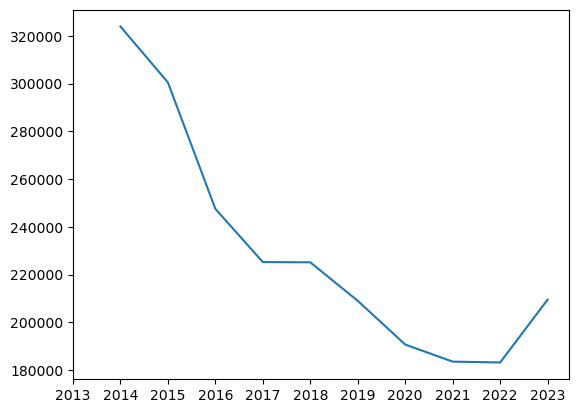

In [109]:
plt.plot(Econm.index,Econm.values)
plt.xticks(range(2013,2024))
plt.savefig('Econm.png')
plt.show()

In [7]:
df

,Index,Education level,Degree,Tuition fees,ID,Branches of Science,Group of Professions,Year,Number of Applications,Number of Students
0,1,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Mathematics and Mechanics,2014,47923.0,7144.0
1,2,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Computer Science,2014,28787.0,3238.0
2,3,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Physics and Astronomy,2014,23906.0,4391.0
3,4,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Chemistry,2014,25930.0,2367.0
4,5,Higher Education,Bachelor's degree,Scholarship / tuition-free,1,Mathematical and Natural Sciences,Earth Science,2014,43434.0,6745.0
...,...,...,...,...,...,...,...,...,...,...
5563,5564,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,8,Arts and Culture,Design and Restoration,2014,NaN,3471.0
5564,5565,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,8,Arts and Culture,Film and Screen Arts,2014,NaN,162.0
5565,5566,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,9,Military Science,Military Management,2014,NaN,0.0
5566,5567,Vocational Education,Mid-Career Professionals,Full pay / tuition fee,9,Military Science,Ensuring National Security,2014,NaN,NaN


<AxesSubplot:xlabel='Group of Professions', ylabel='Number of Applications'>

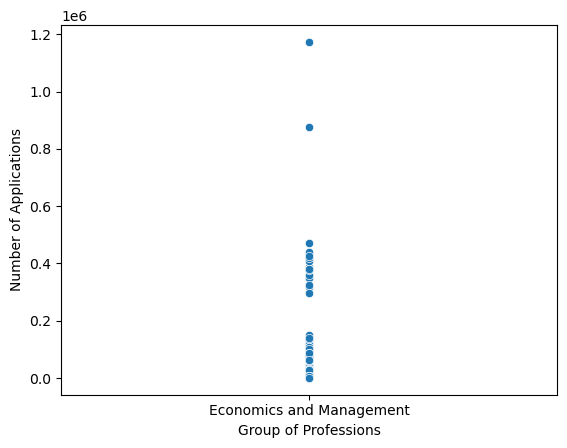